<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

To keep your modifications in case you want to come back later to this colab, do *File -> Save a copy in Drive*.



In [1]:
!wget http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz

--2022-09-28 14:20:18--  http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [text/plain]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M  23.1MB/s    in 1.5s    

2022-09-28 14:20:20 (23.1 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [2]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [3]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [4]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [21]:
#TODO = train_test_split(#TODO)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Then a validation set from the train set:

In [22]:
#TODO = train_test_split(#TODO)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5)

In [23]:
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

(3139, 1001) (3139,) (673, 1001) (673,) (673, 1001) (673,)


Let's hyperparameter gridsearch over different values of `C`:

In [35]:
C_values = np.logspace(0.1, 3, num=15)
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')

  clf = SVC(C=c)

  # Fit on sub-train set
  clf.fit(X_train, y_train)

  # Evaluate on val set
  acc = clf.score(X_valid, y_valid)
  accuracies.append(acc)

  print(f'--> accuracy = {acc}')

Training SVM with C=1.2589254117941673
--> accuracy = 0.5468053491827637
Training SVM with C=2.028349816662018
--> accuracy = 0.5913818722139673
Training SVM with C=3.268027589410125
--> accuracy = 0.6433878157503715
Training SVM with C=5.2653660810448635
--> accuracy = 0.6909361069836553
Training SVM with C=8.483428982440719
--> accuracy = 0.711738484398217
Training SVM with C=13.668293180829261
--> accuracy = 0.7355126300148589
Training SVM with C=22.022019499873757
--> accuracy = 0.7473997028231798
Training SVM with C=35.48133892335755
--> accuracy = 0.7533432392273403
Training SVM with C=57.166665019136154
--> accuracy = 0.7533432392273403
Training SVM with C=92.10553176894815
--> accuracy = 0.7563150074294205
Training SVM with C=148.39817889675646
--> accuracy = 0.7563150074294205
Training SVM with C=239.095514427051
--> accuracy = 0.7563150074294205
Training SVM with C=385.22484200367535
--> accuracy = 0.7563150074294205
Training SVM with C=620.6648387041713
--> accuracy = 0.7563

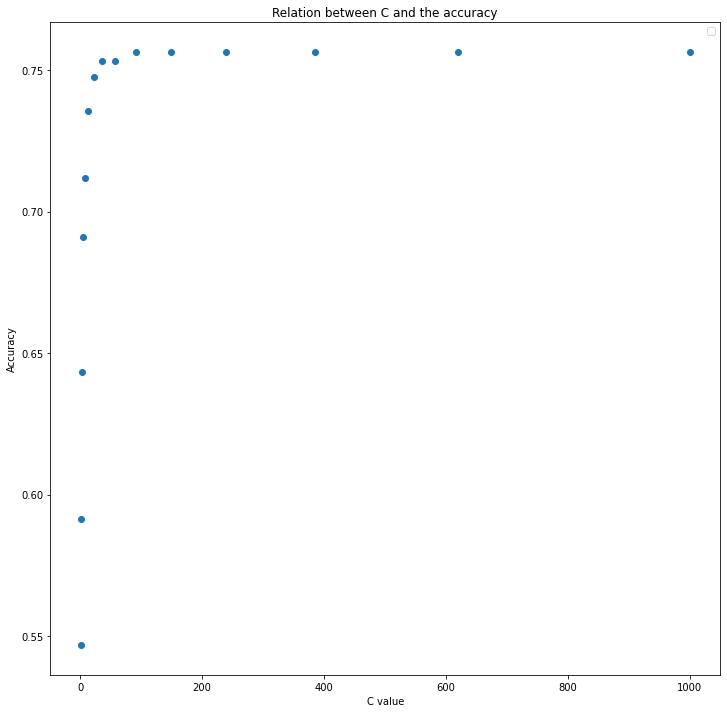

In [36]:
# TODO plot the relation between `c` and the accuracy
plt.figure(figsize=(8,8))
plt.scatter(C_values, accuracies)
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Relation between C and the accuracy")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

clf = SVC(C=c)
clf.fit(X_train, y_train)
acc = clf.score(X_valid, y_valid)

print(acc)

Do the same with different kernel values, and different decision functions:

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# C_values = np.logspace(0.1, 3, num=10)
C_values = [150]
parameters = {'kernel':('linear', 'rbf', 'sigmoid', 'poly'), 'C':C_values, 'class_weight':[None, 'balanced']}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, n_jobs=-1, verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [150], 'class_weight': [None, 'balanced'],
                         'kernel': ('linear', 'rbf', 'sigmoid', 'poly')},
             verbose=3)

In [53]:
clf.cv_results_

{'mean_fit_time': array([4.47415767, 3.65855021, 3.34149747, 3.27015991, 4.25992351,
        3.74554687, 3.45308647, 3.29195294]),
 'std_fit_time': array([0.30581381, 0.06445105, 0.1574242 , 0.04574842, 0.35808131,
        0.31762738, 0.18067729, 0.04470966]),
 'mean_score_time': array([1.32216091, 2.3134738 , 1.40225487, 0.98244963, 1.05805655,
        2.33294282, 1.39046297, 0.9007453 ]),
 'std_score_time': array([0.33172922, 0.05383452, 0.06014748, 0.0553951 , 0.07141812,
        0.03171155, 0.02372547, 0.21602683]),
 'param_C': masked_array(data=[150, 150, 150, 150, 150, 150, 150, 150],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_class_weight': masked_array(data=[None, None, None, None, 'balanced', 'balanced',
                    'balanced', 'balanced'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_k

In [54]:
clf.best_params_

{'C': 150, 'class_weight': None, 'kernel': 'rbf'}

In [55]:
clf.score(X_test, y_test)

0.7429420505200595